In [21]:
## https://towardsdatascience.com/finding-shortest-path-using-q-learning-algorithm-1c1f39e89505

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random

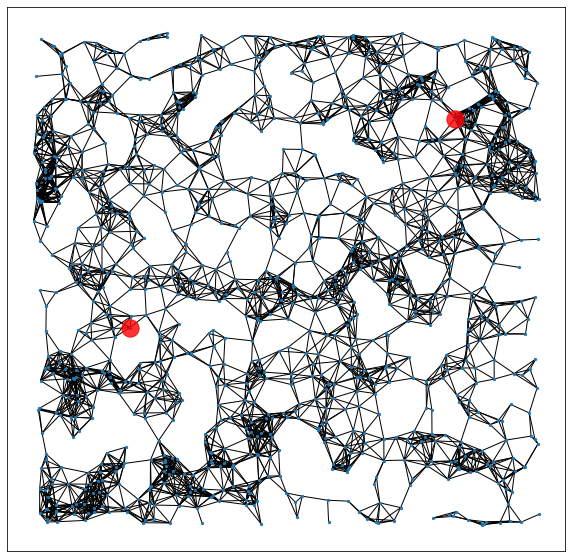

In [2]:
random.seed(20)        # or any integer
np.random.seed(20)

source = 146
target = 124

node_size = 1000

G = nx.random_geometric_graph(node_size, 0.055)
pos = nx.get_node_attributes(G, 'pos')

plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(G,pos,node_size=5)
nx.draw_networkx_nodes(G, pos, nodelist=[source,target], node_color="r",alpha= 0.8)
nx.draw_networkx_edges(G,pos)
plt.show()

In [3]:
for edge in G.edges:
    G.edges[edge]['dist'] = ((pos[edge[0]][0]-pos[edge[1]][0])**2+(pos[edge[0]][0]-pos[edge[1]][0])**2)**(1/2)

In [4]:
R = np.matrix(np.zeros(shape=(node_size,node_size)))
for x in G[target]:
    R[x,target]=100

In [5]:
R

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
Q = np.matrix(np.zeros(shape=(node_size,node_size)))
Q-=100
 
for node in G.nodes:
    for x in G[node]:
        Q[node,x]=-G.edges[(node,x)]['dist']

In [7]:
Q

matrix([[-100., -100., -100., ..., -100., -100., -100.],
        [-100., -100., -100., ..., -100., -100., -100.],
        [-100., -100., -100., ..., -100., -100., -100.],
        ...,
        [-100., -100., -100., ..., -100., -100., -100.],
        [-100., -100., -100., ..., -100., -100., -100.],
        [-100., -100., -100., ..., -100., -100., -100.]])

In [8]:
def next_number(start,er):
    random_value = random.uniform(0,1)
    if random_value<er:
        sample=G[start]
    else:
        sample = np.where(Q[start,]==np.max(Q[start,]))[1]
    try:
        next_node = np.random.choice(sample,1)
    except KeyError:
        sample = np.where(Q[start,]==np.max(Q[start,]))[1]
        next_node=np.random.choice(sample,1)
    return next_node

def updateQ(node1,node2,lr,discount):
    max_index = np.where(Q[node2,]==np.max(Q[node2,]))[1]
    if max_index.shape[0]>1:
        max_index=int(np.random.choice(max_index,size=1))
    else:
        max_index=int(max_index)
    max_value=Q[node2,max_index]
    Q[node1,node2]=(1-lr)*Q[node1,node2]+lr*(R[node1,node2]+discount*max_value)

def learn(er,lr,discount,epoch):
    for i in range(epoch):
        start=np.random.randint(0,node_size)
        next_node = next_number(start,er)
        updateQ(start,next_node,lr,discount)
        
def shortest_path(source,target):
    path = [source]
    next_node = np.argmax(Q[source,])
    path.append(next_node)
    while next_node!=target:
        next_node=np.argmax(Q[next_node,])
        path.append(next_node)
    return path

In [11]:
%%time

R = np.matrix(np.zeros(shape=(node_size,node_size)))
for x in G[target]:
    R[x,target]=10
    
Q = np.matrix(np.zeros(shape=(node_size,node_size)))
Q-=10
 
for node in G.nodes:
    for x in G[node]:
        Q[node,x]=-G.edges[(node,x)]['dist']
        
        
learn(0.5,0.9,0.8,50000)
print('learning complete')
sol_path = shortest_path(source,target)
weights = sum([G.edges[(sol_path[i],sol_path[i+1])]['dist'] for i in range(len(sol_path)-1)])
print('path : ',sol_path)
print('dist : ',weights)

learning complete
path :  [146, 494, 466, 246, 317, 604, 384, 473, 414, 689, 441, 912, 608, 208, 35, 990, 169, 251, 10, 983, 301, 490, 567, 789, 485, 622, 124]
dist :  0.9578428787437268
CPU times: user 5.53 s, sys: 0 ns, total: 5.53 s
Wall time: 5.53 s


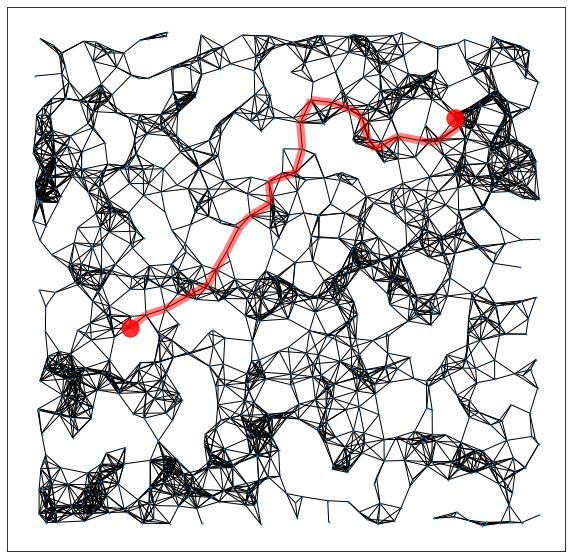

In [12]:
plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(G,pos,node_size=1)
nx.draw_networkx_nodes(G, pos, nodelist=[source,target], node_color="r",alpha= 0.8)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_edges(
    G,
    pos,
    edgelist=[(sol_path[i],sol_path[i+1]) for i in range(len(sol_path)-1)],
    width=8,
    alpha=0.5,
    edge_color="r",
)
plt.show()

#### 다익스트라와 비교

In [13]:
%%time

dai_path = nx.shortest_path(G,source,target,weight='dist')
weights = sum([G.edges[(dai_path[i],dai_path[i+1])]['dist'] for i in range(len(dai_path)-1)])
print('path : ',dai_path)
print('dist : ',weights)

path :  [146, 718, 476, 1, 646, 788, 626, 999, 170, 96, 689, 441, 474, 809, 912, 648, 608, 208, 35, 990, 683, 784, 251, 10, 983, 301, 490, 232, 523, 789, 485, 622, 124]
dist :  0.9189790104271974
CPU times: user 3.39 ms, sys: 0 ns, total: 3.39 ms
Wall time: 3.26 ms


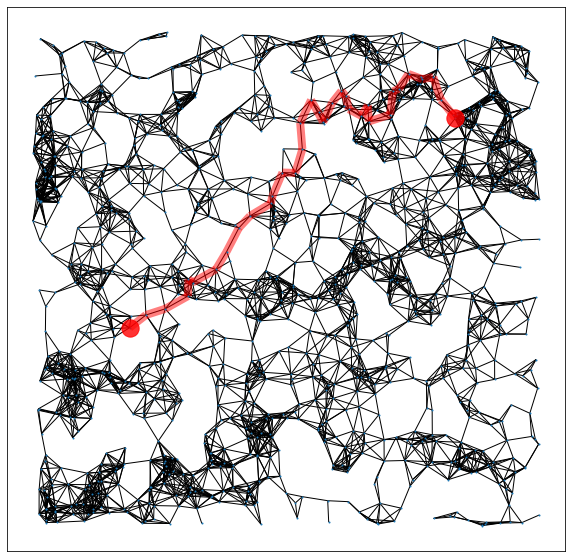

In [14]:
plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(G,pos,node_size=1)
nx.draw_networkx_nodes(G, pos, nodelist=[source,target], node_color="r",alpha= 0.8)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_edges(
    G,
    pos,
    edgelist=[(dai_path[i],dai_path[i+1]) for i in range(len(dai_path)-1)],
    width=8,
    alpha=0.5,
    edge_color="r",
)
plt.show()